In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Time spend on social media_data.csv")

In [3]:
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [4]:
df.head()

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,age,time_spent,income
count,1000.000000,1000.000000,1000.000000
mean,40.986000,5.029000,15014.823000
std,13.497852,2.537834,2958.628221
min,18.000000,1.000000,10012.000000
25%,29.000000,3.000000,12402.250000
50%,42.000000,5.000000,14904.500000
75%,52.000000,7.000000,17674.250000
max,64.000000,9.000000,19980.000000


In [8]:
df.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

In [9]:
df['gender'].value_counts()

gender
male          337
non-binary    332
female        331
Name: count, dtype: int64

In [10]:
df = df[df['gender'] != 'non-binary']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           668 non-null    int64 
 1   gender        668 non-null    object
 2   time_spent    668 non-null    int64 
 3   platform      668 non-null    object
 4   interests     668 non-null    object
 5   location      668 non-null    object
 6   demographics  668 non-null    object
 7   profession    668 non-null    object
 8   income        668 non-null    int64 
 9   indebt        668 non-null    bool  
 10  isHomeOwner   668 non-null    bool  
 11  Owns_Car      668 non-null    bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 54.1+ KB


<Axes: title={'center': 'Male vs. Female'}, xlabel='gender'>

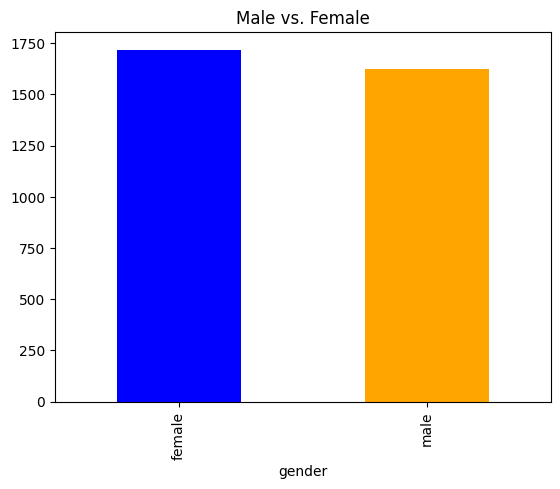

In [12]:
df.groupby('gender')['time_spent'].sum().plot(kind = 'bar',
                                              title = "Male vs. Female",
                                              x = 'Gender',
                                              y = 'Time Spent',
                                              color=['blue', 'orange'])

<Axes: ylabel='Frequency'>

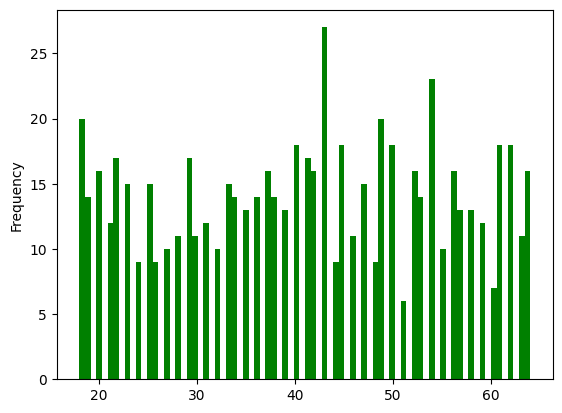

In [13]:
df.sort_values('age')
df['age'].plot(x = 'age' , kind = 'hist' , bins = 80 , color = 'green')

<Axes: xlabel='income', ylabel='Count'>

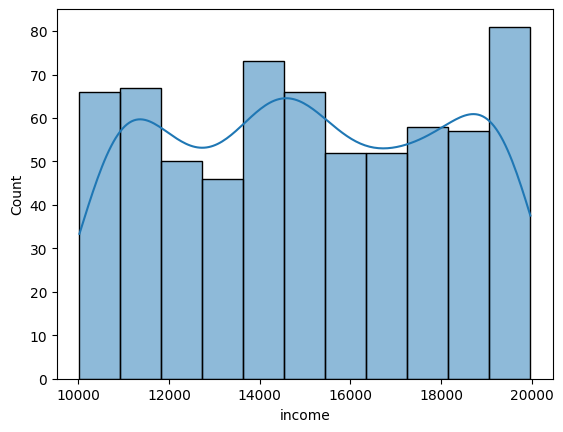

In [14]:
import warnings
warnings.filterwarnings("ignore")


sns.histplot(df["income"],kde=True)

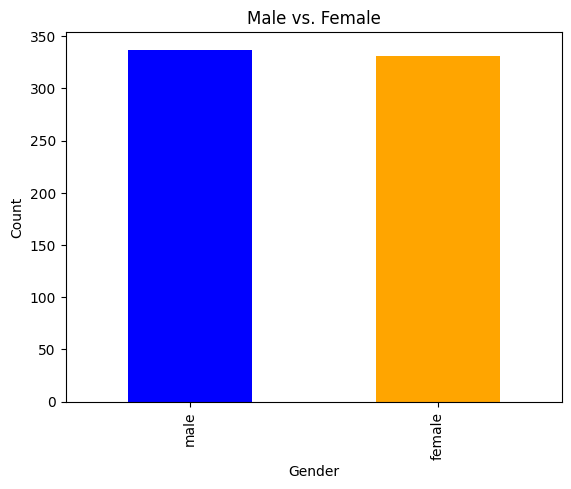

In [15]:
gender_counts = df['gender'].value_counts()
gender_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Male vs. Female")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='demographics', ylabel='count'>

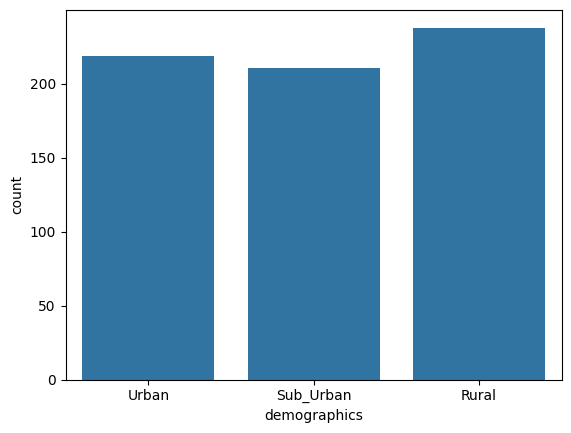

In [16]:
sns.countplot(x=df["demographics"])

<Axes: xlabel='Owns_Car', ylabel='count'>

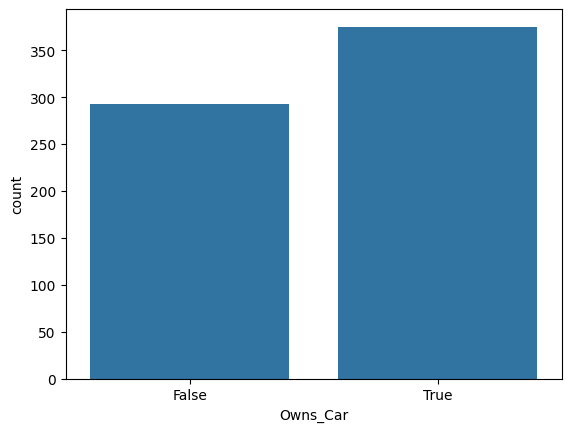

In [17]:
sns.countplot(x= df['Owns_Car'])

<Axes: xlabel='isHomeOwner', ylabel='count'>

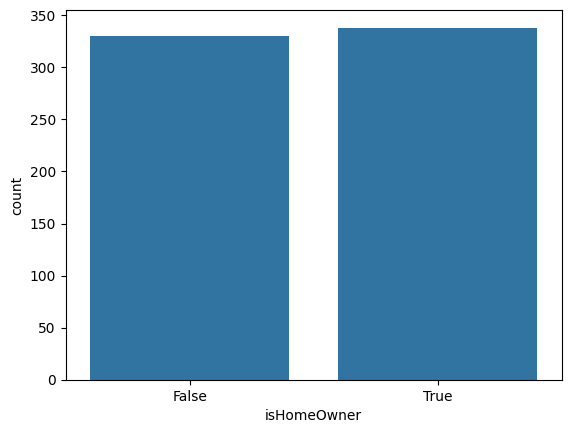

In [18]:
sns.countplot(x =df['isHomeOwner'])

In [19]:
def screen_time(number):
    if number>6:
        return "Extreme"
    elif number>4:
        return "High"
    elif number>2 :
        return "Moderate"
    else :
        return "Normal"

In [20]:
def life_stage(age):
    if age > 60:
        return "old"
    elif age>=40:
        return "middle_age"
    elif age >= 18:
        return "young"
    else:
        return "teenage"

In [21]:
df['life_stage']= df['age'].apply(life_stage)

In [22]:
df['screen_time'] = df['time_spent'].apply(screen_time)

<Axes: xlabel='life_stage', ylabel='count'>

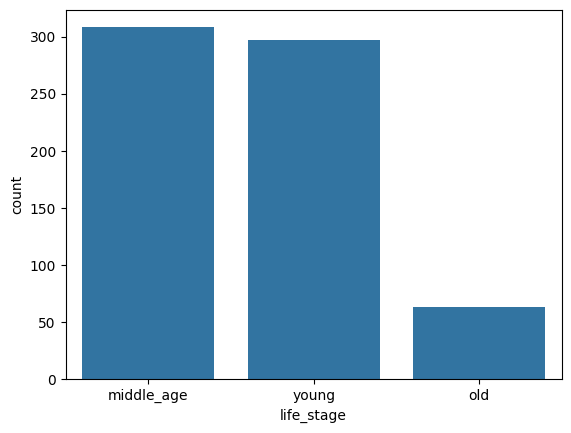

In [23]:
sns.countplot(x= df['life_stage'])

<Axes: xlabel='screen_time', ylabel='count'>

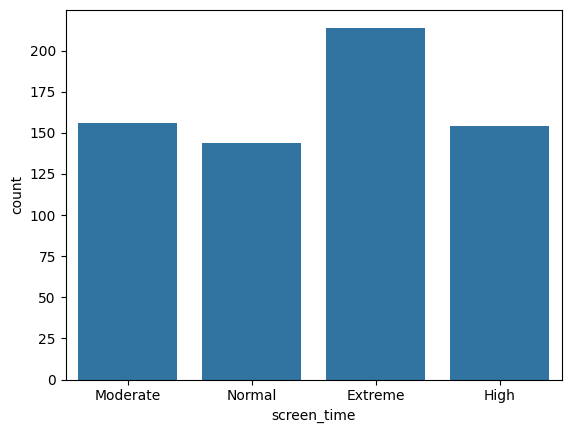

In [25]:
sns.countplot(x= df['screen_time'])